In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('Set2', n_colors=10)

In [14]:
pf = pd.read_csv("pseudo_facebook.tsv", sep='\t')

In [15]:
pf.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


### Scatterplots

Looks like some users lie about their age (60+, 100+) - most probably those are teenagers:

[(13, 90)]

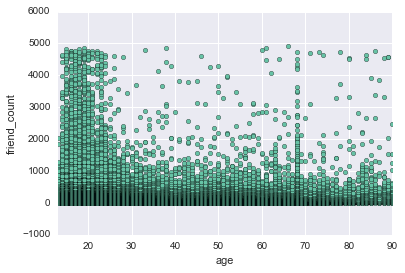

In [16]:
pf.plot(kind='scatter', x='age', y='friend_count').set(xlim = (13,90))

To reduce overplotting:

In [17]:
pf['friend_count_sqrt'] = np.sqrt(pf['friend_count'])

[(0, 100), (13, 90)]

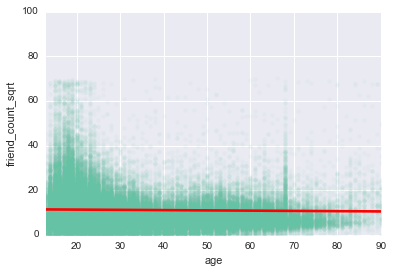

In [18]:
ax = sns.regplot(x='age', y='friend_count_sqrt', data=pf, scatter_kws={'alpha':0.05}, line_kws={'color':'red'})
ax.set(xlim = (13,90), ylim = (0, 100))

[(0, 4000), (13, 90)]

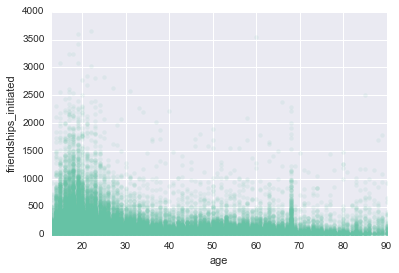

In [19]:
ax = sns.regplot(x='age', y='friendships_initiated', data=pf, fit_reg=False, scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
ax.set(xlim = (13,90), ylim = (0, 4000))

### Conditional means

In [20]:
d = {'mean':'mean',
     'median':'median',
     'q10': lambda x:x.quantile(0.1),
     'q90': lambda x:x.quantile(0.9),
     'n': 'size'}
pf_by_age = pf.groupby(['age'])['friend_count'].agg(d).reset_index()
pf_by_age.head()

,age,q90,n,median,q10,mean
0,13,412.7,484,74.0,3.0,164.750000
1,14,569.6,1925,132.0,12.4,251.390130
2,15,811.6,2618,161.0,16.0,347.692131
3,16,817.0,3086,171.5,18.0,351.937135
4,17,808.6,3283,156.0,18.0,350.300640


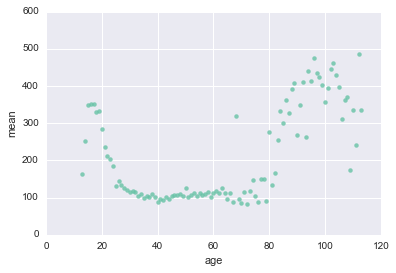

In [21]:
ax = sns.regplot(x='age', y='mean', data=pf_by_age, fit_reg=False)

### Overlaying summaries

[(0, 500), (13, 90)]

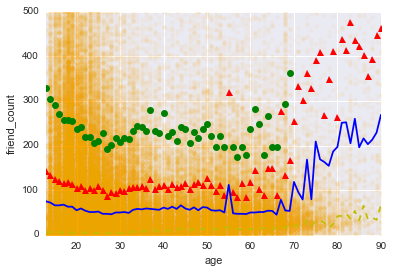

In [22]:
ax = sns.regplot(x='age', y='friend_count', data=pf, fit_reg=False, scatter_kws={'alpha':0.05}, color='orange')
plt.plot(pf_by_age['mean'], 'r^')
plt.plot(pf_by_age['median'], 'b-')
plt.plot(pf_by_age['q10'], 'y--')
plt.plot(pf_by_age['q90'], 'go')
ax.set(xlim = (13,90), ylim = (0, 500))

About 90% of users of age between 35-60 have less friends then 250 (green)

In [23]:
pf.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,friend_count_sqrt
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,0.0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,0.0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,0.0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,0.0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,0.0


### Correlation

In [24]:
print pf['age'].corr(pf['friend_count'])

-0.0274073715423


In [25]:
sub = pf[pf['age']<=70]
print sub['age'].corr(sub['friend_count'])

-0.171724482702


In [26]:
sub = pf[pf['age']<=70]
print sub['age'].corr(sub['friend_count'], method='spearman')

-0.255293395493


In [27]:
sub = pf
print sub['www_likes_received'].corr(sub['likes_received'])

0.947990180346


In [28]:
sub.corr()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,friend_count_sqrt
userid,1.000000,-0.007265,-0.000839,0.007265,0.002924,-0.003446,-0.001314,-0.001591,-0.002875,0.001526,-0.004868,0.001753,0.001828,0.001074,0.001204
age,-0.007265,1.000000,0.035035,-1.000000,0.025167,0.462742,-0.027407,-0.058059,-0.013009,-0.022570,-0.026715,-0.024248,0.015585,-0.018224,-0.030717
dob_day,-0.000839,0.035035,1.000000,-0.035035,0.129443,0.041855,0.021961,0.022999,0.015980,0.001367,0.014541,0.000497,0.009353,0.002460,0.037769
dob_year,0.007265,-1.000000,-0.035035,1.000000,-0.025167,-0.462742,0.027407,0.058059,0.013009,0.022570,0.026715,0.024248,-0.015585,0.018224,0.030717
dob_month,0.002924,0.025167,0.129443,-0.025167,1.000000,0.029446,0.019804,0.020075,0.014147,0.006495,0.010400,0.006435,0.012136,0.006003,0.033238
tenure,-0.003446,0.462742,0.041855,-0.462742,0.029446,1.000000,0.166256,0.133505,0.057132,0.027745,0.028052,0.023971,0.070757,0.030553,0.236204
friend_count,-0.001314,-0.027407,0.021961,0.027407,0.019804,0.166256,1.000000,0.825850,0.298017,0.236463,0.235656,0.232701,0.229803,0.220727,0.903591
friendships_initiated,-0.001591,-0.058059,0.022999,0.058059,0.020075,0.133505,0.825850,1.000000,0.285592,0.175131,0.229808,0.173804,0.214022,0.161439,0.837855
likes,-0.002875,-0.013009,0.015980,0.013009,0.014147,0.057132,0.298017,0.285592,1.000000,0.327376,0.871652,0.329258,0.644960,0.295687,0.312679
likes_received,0.001526,-0.022570,0.001367,0.022570,0.006495,0.027745,0.236463,0.175131,0.327376,1.000000,0.256998,0.973679,0.255365,0.947990,0.204109


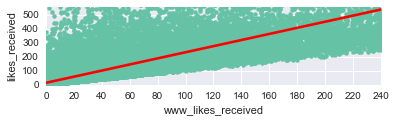

In [29]:
ax = sns.regplot(x='www_likes_received', y='likes_received', data=pf,
                 fit_reg=True, ci=None, 
                 line_kws={'color':'red'}, scatter_kws={'alpha':1})
res = ax.set(xlim = (0, pf['www_likes_received'].quantile(0.95)), ylim = (0, pf['likes_received'].quantile(0.95)))
res = ax.set(xticks = range(0, 250, 20), aspect=0.1)

**Note**:  scaling axes helps better see shapes

### Noise

In [30]:
pf['age_with_months'] = pf['age'] + (12 - pf['dob_month'])/ 12
d = {'mean':'mean',
     'median':'median',
     'q10': lambda x:x.quantile(0.1),
     'q90': lambda x:x.quantile(0.9),
     'n': 'size'}
pf_by_age_with_month = pf.groupby(['age_with_months'])['friend_count'].agg(d).reset_index()
pf_by_age_with_month.head()

,age_with_months,q90,n,median,q10,mean
0,13.166667,107.5,6,30.5,1.0,46.333333
1,13.250000,268.4,14,23.5,0.0,115.071429
2,13.333333,279.0,25,44.0,2.0,136.200000
3,13.416667,328.0,33,72.0,5.2,164.242424
4,13.500000,223.6,45,66.0,9.4,131.177778


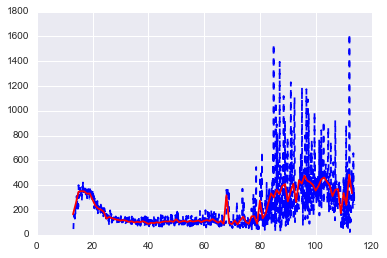

In [31]:
plt.plot(pf_by_age_with_month['age_with_months'], pf_by_age_with_month['mean'], 'b--') 
plt.plot(pf_by_age['age'], pf_by_age['mean'], 'r-') 

#### Smoothing

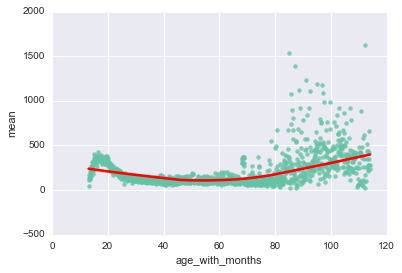

In [32]:
ax = sns.regplot(x='age_with_months', y='mean', data=pf_by_age_with_month, lowess=True, line_kws={'color':'red'})